# Exam 1 Fall 2022 (100 pts total)

files needed = ('interest.csv', 'dogs.xlsx', 'messy1.xlsx', 'messy2.xlsx', 'messy3.csv'), which can be found in `exam1_data.zip`

You have 75 minutes to complete this exam.

Answer all the questions below in this notebook. You should insert as many cells into the notebook as you need. When you are finished, upload your finished notebook to Canvas. 

* You may use your notes and the Internet, but you cannot work with others.  
* Import any packages you need to complete this exam.
* Do not modify the data files directly. All data manipulation should happen in your code.

Remember, jupyter notebooks and python have lots of built in help facilities.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Question 0 (5 points): Last, First
 
Replace 'Last, First' above with your actual name. Enter it as: last name, first name.

## Question 1 (30 points): Plotting


The file 'interest.csv' contains annual data on the average 30-year mortgage interest rate (`MORTGAGE30US`) and the CPI inflation rate (`CPIAUCSL_PC1`).

1. Create a line plot with the date on the x-axis. Plot the mortgage rate in black and the inflation rate in red.
2. The figure size should be 12 inches wide and 8 inches tall. 
3. Both lines should have weight 2.
4. The tick labels on both axes should have font size 18.
5. The x-axis should range from 1971 to 2022.

Make any further adjustments you find necessary. 

In [2]:
interest = pd.read_csv('interest.csv', index_col='DATE')
print(interest.head(1), '\n')
print(interest.dtypes)

      MORTGAGE30US  CPIAUCSL_PC1
DATE                            
1948           NaN       7.67221 

MORTGAGE30US    float64
CPIAUCSL_PC1    float64
dtype: object


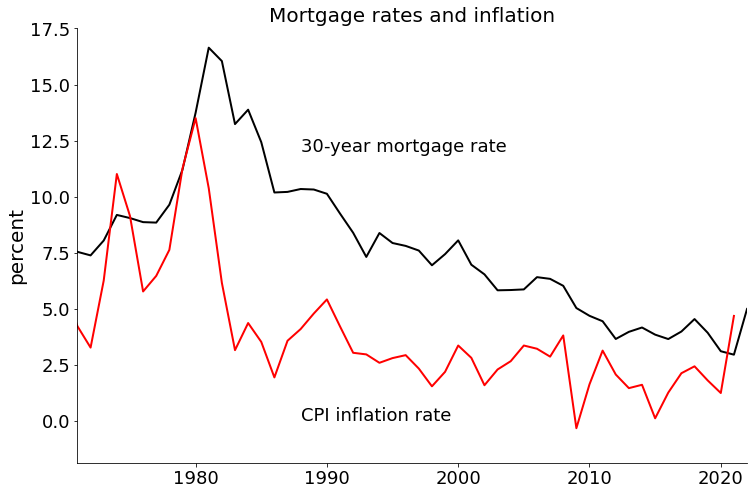

In [3]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(interest.index, interest['MORTGAGE30US'], color='black', lw=2.0)
ax.plot(interest.index, interest['CPIAUCSL_PC1'], color='red', lw=2.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', labelsize=18)
ax.set_ylabel('percent', fontsize=20)
ax.set_title('Mortgage rates and inflation', fontsize=20)

ax.text(1988, 12, '30-year mortgage rate', fontsize=18)
ax.text(1988, 0, 'CPI inflation rate', fontsize=18)

ax.set_xlim(1971, 2022)

plt.show()

## Question 2 (5 points): Graphical excellence 

Insert a markdown cell below this cell and type your answer to the following question. You do not need to write any code. 

The figure you created above suggests that inflation and interest rates are related. 

1. I want my message to be **"mortgage rates go up when interest goes up."** How would you change the figure you created in question 1 to better communicate that message? Explain why.

### Solution

There is room for more than one answer here. My answer: 

I would create a scatter plot with the inflation rate on the x-axis and the interest rate on the y-axis. We want to show a positive correlation: When inflation rises, mortgage rates rise. The scatter plot will make is easier to see the positive correlation and will allow the reader to see the strength of the correlation. 

Some students wrote about another good way: 

1. Compute the growth rates of the two variables and plot those. 
2. Use the lagged mortgage rate to understand the dynamic correlation.
3. Compute the correlation or plot the regression line.

## Question 3 (20 points): Working with DataFrames 

The file 'dogs.xlsx' contains data about three dogs: Buster, Subee, and Jax. For each dog, the dataset records the number of snacks and walks each dog had on a given day. 

Use the data to answer the following questions.

In [4]:
d = pd.read_excel('dogs.xlsx')
d.head(2)

dog       time  snacks  walks
0  Buster  10/1/2018       4    2.0
1  Buster  10/2/2018       3    2.0

1. What is the average number of snacks that Buster eats per day? Print the answer as 

   "Buster averages ?.? snacks per day."
   
   Replace ?.? with the answer. Match the formatting of the number.

In [5]:
buster_snack_avg = d[d['dog']=='Buster']['snacks'].mean()
print('Buster averages {0:2.1f} snacks per day.'.format(buster_snack_avg))

Buster averages 3.6 snacks per day.


2. Create a DataFrame that contains only the data for Buster and Jax. 

   How many columns and rows are in this DataFrame? Print the answer as 

   "The Buster and Jax DataFrame has ? columns and ?? rows."
   
   Replace the ? and ?? with the answers.

In [6]:
jb_df = d[d['dog'].isin(['Buster', 'Jax'])]
jb_shape = jb_df.shape
print('The Buster and Jax DataFrame has {1} columns and {0} rows.'.format(jb_shape[0], jb_shape[1]))

# A better way is to use * to unpack the tuple returned by .shape. 
#print('The Buster and Jax DataFrame has {1} columns and {0} rows.'.format(*jb_df.shape))

The Buster and Jax DataFrame has 4 columns and 11 rows.


## Question 4 (15 points): Loading messy data 

Let's load three datasets. Each one has something wrong with it. 

1. [Footer.] Load the file 'messy1.xlsx' into a DataFrame. Make sure that the variables (v1 through v8) are all of type `float64`. Print out the types of the variables.

In [7]:
pd.read_excel('messy1.xlsx', skipfooter=4).dtypes

v1    float64
v2    float64
v3    float64
v4    float64
v5    float64
v6    float64
v7    float64
v8    float64
dtype: object

2. [Missing data.] Load the file 'messy2.xlsx' into a DataFrame. Make sure that the variables (v1 through v8) are all of type `float64`. Print out the types of the variables.

In [8]:
pd.read_excel('messy2.xlsx', na_values=['N/A', 'MISSING']).dtypes

v1    float64
v2    float64
v3    float64
v4    float64
v5    float64
v6    float64
v7    float64
v8    float64
dtype: object

3. [Separator not a comma.] Load the file 'messy3.csv' into a DataFrame. While the suffix of the file is `.csv`, the data are not separated by commas. Use pd.read_csv() to load the data. Print out the shape of the DataFrame. 

Hint: Open the file in a text editor such as *notepad++* and check the delimiter type.  

In [9]:
pd.read_csv('messy3.csv', sep=';').shape

(999, 8)

## Question 5 (20 points): Slicing and types

For each value in the following list, extract the year (the 4 numeric digits) and store them in a list. Print out the list, sorted from smallest to largest. 

```python
strlist = ['yy2022yy', 'yy1980yy', 'yy1991yy', 'yy1793yy', 'yy1288yy']
```

The output should be `[1288, 1793, 1980, 1991, 2022]`.

In [10]:
strlist = ['yy2022yy', 'yy1980yy', 'yy1991yy', 'yy1793yy', 'yy1288yy']
dates = []

# As a loop
for k in strlist:
    dates.append( int(k[2:6]) )
    
# Or as a list comprehension
# dates = [int(k[2:6]) for k in strlist]
    
dates.sort()
dates

[1288, 1793, 1980, 1991, 2022]

## Question 6 (5 points): Using error messages

The code below contains two errors. Correct them both so that the code runs without error. 

In [11]:
df = pd.DataFrame({'names':['Bucky', 'Brutus', 'Sparty'], 'school':['UW', 'OSU', 'MSU']})
print( df.shape() )
df.drop('school', inplace=True)
print(df)

TypeError: 'tuple' object is not callable

In [12]:
# Solution

df = pd.DataFrame({'names':['Bucky', 'Brutus', 'Sparty'], 'school':['UW', 'OSU', 'MSU']})
print( df.shape ) # Shape is an attribute, not a method. No (). 
df.drop('school', inplace=True, axis=1) # We need to search the columns, not the rows.
print(df)

(3, 2)
    names
0   Bucky
1  Brutus
2  Sparty


### You are finished!
Upload your completed notebook to Canvas.